<a href="https://colab.research.google.com/github/kiq-caique/inteligencia_artificial_UFV/blob/main/ELT_574_118535_Atividade3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nova seção

In [2]:
#Importando as bibliotecas para análise do problema e configurando o notebook

## OS para executar comandos de diretorio
import os

## Habilitar Google Drive no Colab
# from google.colab import drive
# drive.mount('/content/drive')

## NumPy para manipular matrizes e vetores
import numpy as np

## Pandas para manipular os dataframes
import pandas as pd

## Plotar figuras bonitas
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

print('Setup completo!')

Setup completo!


In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full.shape

4422102/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

In [8]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255. #o ponto em 255. caracteriza a conversao para float
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

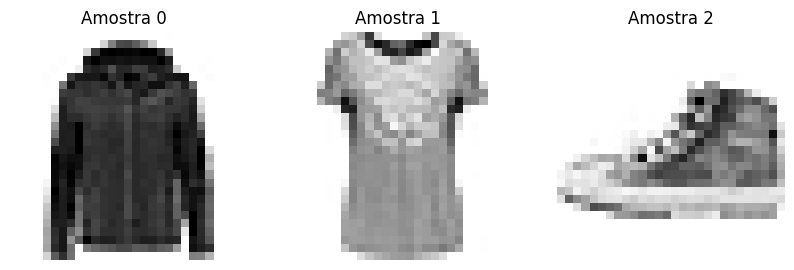

In [9]:
plt.figure(figsize=(10,4))
plt.subplot(131)
plt.imshow(X_train[0], cmap="binary")
plt.title('Amostra 0')
plt.axis('off')

plt.subplot(132)
plt.imshow(X_train[1], cmap="binary")
plt.title('Amostra 1')
plt.axis('off')

plt.subplot(133)
plt.imshow(X_train[2], cmap="binary")
plt.title('Amostra 2')
plt.axis('off')
plt.show()

# Fase 2

In [430]:
print(y_train)
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

[4 0 7 ... 3 0 5]


In [431]:
class_names[y_train[0]]

'Coat'

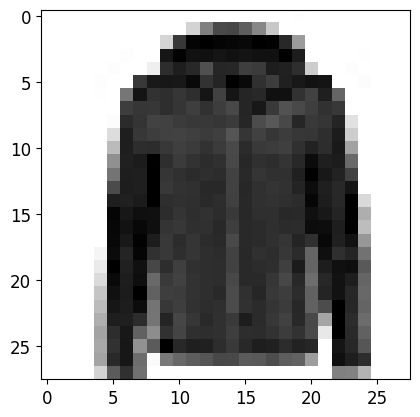

In [432]:
plt.imshow(X_train[0], cmap="binary")

In [433]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_y = pd.DataFrame(y_train)

In [434]:
df_y.value_counts()

,count
0,
0,5543
4,5512
8,5510
5,5507
6,5507
3,5499
2,5496
9,5494
7,5488


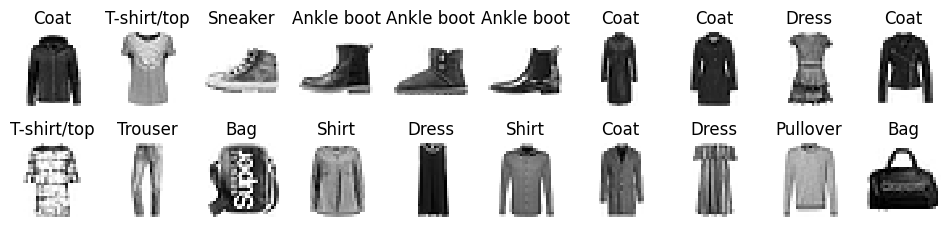

In [435]:
n_rows = 2
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [436]:
# # Criando o modelo de PMC
# ## Declaracao do modelo sequencial para o Keras
# model = keras.models.Sequential()
# ## Camada de entrada (flatten transforma a imagem 28x28 em um vetor 1D de 784 valores)
# model.add(keras.layers.Flatten(input_shape=[28, 28]))
# ## Primeira camada escondida, com 300 neuronios e funcao de ativacao ReLU;
# ### Cada camada 'Dense' gerencia seus proprios parametros, incluindo bias
# model.add(keras.layers.Dense(500, activation="relu"))
# ## Segunda camada escondida, com 100 neuronios e ReLU
# model.add(keras.layers.Dense(200, activation="relu"))
# ## Camada de saida com 10 neuronios e funcao de ativacao softmax (multiclasse)
# model.add(keras.layers.Dense(10, activation="softmax"))

In [437]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

# Camada Convolucional 1
model.add(layers.Conv2D(16, (5, 5), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

# Camada Convolucional 2
model.add(layers.Conv2D(32, (5, 5), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

# Camada Convolucional 3
model.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

# Camada Totalmente Conectada
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# Compilar o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumo do modelo
model.summary()


Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 batch_normalization_13 (Ba  (None, 14, 14, 16)        64        
 tchNormalization)                                               
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 32)        12832     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                     

In [438]:
# import tensorflow as tf
# from keras.regularizers import l2
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Flatten(input_shape=[28, 28]),
#     tf.keras.layers.Dense(300, activation="relu"),
#     tf.keras.layers.Dense(200, activation="relu"),
#     tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.03)),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(10, activation="softmax")
# ])

In [439]:
model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 batch_normalization_13 (Ba  (None, 14, 14, 16)        64        
 tchNormalization)                                               
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 32)        12832     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                     

In [440]:
model.layers

In [441]:
hidden1 = model.layers[1]
hidden1

In [442]:
weights.shape

(784, 300)

In [443]:
biases.shape

(300,)

In [444]:
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
# optimizer = SGD(learning_rate=0.01)
# optimizer = Adam(learning_rate=0.001)
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)



In [446]:
history = model.fit(X_train,y_train, epochs=10,
                    validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 [==============================] - 93s 54ms/step - loss: 0.2732 - accuracy: 0.9015 - val_loss: 0.2427 - val_accuracy: 0.9096
Epoch 2/10
1719/1719 [==============================] - 89s 52ms/step - loss: 0.2430 - accuracy: 0.9102 - val_loss: 0.2276 - val_accuracy: 0.9126
Epoch 3/10
1719/1719 [==============================] - 90s 53ms/step - loss: 0.2239 - accuracy: 0.9177 - val_loss: 0.2232 - val_accuracy: 0.9184
Epoch 4/10
1719/1719 [==============================] - 90s 52ms/step - loss: 0.2037 - accuracy: 0.9246 - val_loss: 0.2799 - val_accuracy: 0.9020
Epoch 5/10
1719/1719 [==============================] - 90s 53ms/step - loss: 0.1851 - accuracy: 0.9305 - val_loss: 0.2192 - val_accuracy: 0.9244
Epoch 6/10
1719/1719 [==============================] - 88s 51ms/step - loss: 0.1703 - accuracy: 0.9359 - val_loss: 0.2308 - val_accuracy: 0.9184
Epoch 7/10
1719/1719 [==============================] - 91s 53ms/step - loss: 0.1613 - accuracy: 0.9390 - val_loss: 0.2466 -

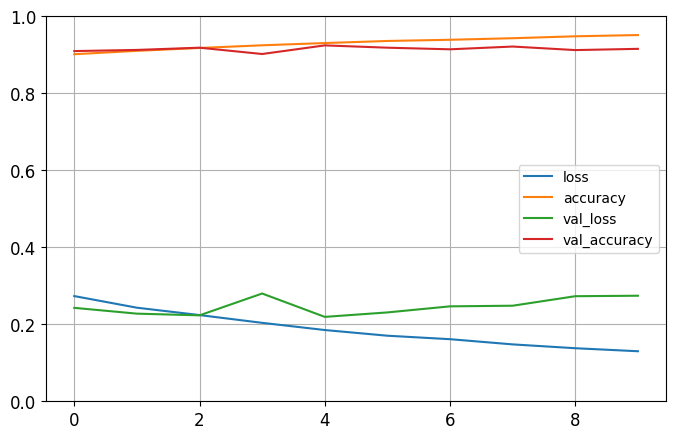

In [447]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # ajusta o eixo y para os limites de 0 a 1
plt.show()

In [448]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.3002 - accuracy: 0.9072


[0.3002098798751831, 0.9071999788284302]

In [449]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
confusion_matrix(y_test, np.argmax(y_pred,axis=1))

313/313 [==============================] - 6s 19ms/step


array([[786,   1,  12,  12,   4,   1, 178,   0,   6,   0],
       [  0, 987,   0,  11,   0,   0,   1,   0,   1,   0],
       [ 13,   1, 775,   5, 120,   0,  86,   0,   0,   0],
       [  9,   5,  11, 916,  12,   0,  46,   0,   1,   0],
       [  0,   1,  21,  28, 905,   0,  45,   0,   0,   0],
       [  0,   0,   0,   0,   1, 977,   0,  16,   1,   5],
       [ 58,   2,  32,  19,  80,   0, 805,   0,   4,   0],
       [  0,   0,   0,   0,   0,   3,   0, 985,   0,  12],
       [  1,   1,   2,   2,   6,   0,   5,   3, 980,   0],
       [  0,   0,   0,   0,   0,   6,   1,  37,   0, 956]])

In [450]:
X_new = X_test
y_proba = model.predict(X_new)
y_proba.round(5)

313/313 [==============================] - 5s 15ms/step


array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e-05, 0.0000e+00, 0.0000e+00, ..., 1.7964e-01, 4.6000e-04,
        7.0000e-05]], dtype=float32)

In [451]:
for i in y_proba:
  print(i.round(3))

A saída de streaming foi truncada nas últimas 5000 linhas.
[0.    0.    0.999 0.    0.    0.    0.001 0.    0.    0.   ]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0.    0.    0.    0.    0.028 0.    0.972 0.    0.    0.   ]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0.001 0.021 0.001 0.974 0.002 0.    0.001 0.    0.    0.   ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0.    0.    0.001 0.    0.999 0.    0.    0.    0.    0.   ]
[0.    0.    0.    0.    0.    0.    0.    0.001 0.    0.999]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0.    0.001 0.    0.042 0.002 0.    0.003 0.    0.935 0.016]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0.125 0.    0.003 0.001 0.001 0.    0.87  0.    0.    0.   ]
[0.    0.    0.998 0.    0.002 0.    0.    0.    0.    0.   ]
[0.764 0.    0.001 0.    0.    0.    0.235 0.    0.    0.   ]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]

In [452]:
list(y_test[:3])

[9, 2, 1]

In [453]:
y_pred = np.argmax(y_proba,axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [454]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', ..., 'Bag', 'Trouser',
       'Sandal'], dtype='<U11')

In [455]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

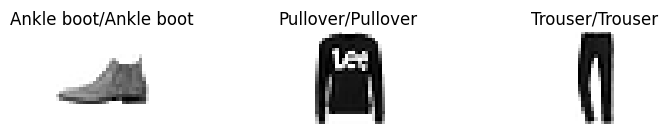

In [456]:
n_rows = 1
n_cols = 3
plt.figure(figsize=(n_cols * 3, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_test[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_test[index]] + '/' + class_names[y_pred[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()